In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For regression analysis later
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# To display plots inline
%matplotlib inline


In [2]:
# Correct function for loading CSV files
file_path = r'tokenized_access_logs.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


In [3]:
import chardet
import pandas as pd

# Read a sample of the file to detect encoding
file_path = r'DataCosupplyChainDataset.csv'
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read(10000))  # Read first 10,000 bytes
    encoding_type = result['encoding']
    print(f"Detected encoding: {encoding_type}")

# Load the dataset with the detected encoding
df = pd.read_csv(file_path, encoding=encoding_type)

# Display the first five rows
print("First 5 rows of the dataset:")
display(df.head())


Detected encoding: ISO-8859-1
First 5 rows of the dataset:


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import chardet

%matplotlib inline

# 1. Load the dataset with encoding detection
file_path = r'DataCosupplyChainDataset.csv'

# Detect encoding
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read(10000))  # Read first 10,000 bytes
    detected_encoding = result['encoding']
    confidence = result['confidence']

print(f"Detected Encoding: {detected_encoding} with confidence {confidence}")

# Attempt to read with detected encoding
try:
    df = pd.read_csv(file_path, encoding=detected_encoding)
    print(f"Successfully read the file with encoding: {detected_encoding}")
except UnicodeDecodeError as e:
    print(f"Failed to read with encoding {detected_encoding}: {e}")
    print("Attempting to read with 'latin1' encoding and replacing errors.")
    df = pd.read_csv(file_path, encoding='latin1', errors='replace')
    print("Successfully read the file with 'latin1' encoding and replaced errors.")

# Display the first five rows
print("First 5 rows of the dataset:")
display(df.head())

# 2. Understanding the data structure
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")
print("Dataset Information:")
print(df.info())
print("\nStatistical Summary for Numerical Columns:")
print(df.describe())
print("\nStatistical Summary for Categorical Columns:")
print(df.describe(include=['object']))
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])

# 3. Handling Missing Values
# a. Numerical columns
numerical_cols = [
    'Days for shipping (real)',
    'Days for shipment (scheduled)',
    'Benefit per order',
    'Sales per customer',
    'Late_delivery_risk',
    'Sales',
    'Order Item Discount',
    'Order Item Discount Rate',
    'Order Item Product Price',
    'Order Item Profit Ratio',
    'Order Item Quantity',
    'Order Item Total',
    'Order Profit Per Order',
    'Latitude',
    'Longitude',
    'Product Price'
]

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Imputed missing values in '{col}' with median value {median_value}.")

# b. Categorical columns
categorical_cols = [
    'Type',
    'Delivery Status',
    'Category Name',
    'Customer City',
    'Customer Country',
    'Customer Email',
    'Customer Fname',
    'Customer Lname',
    'Customer Password',
    'Customer Segment',
    'Customer State',
    'Customer Street',
    'Customer Zipcode',
    'Department Name',
    'Market',
    'Order City',
    'Order Country',
    'Order Status',
    'Order Region',
    'Order State',
    'Order Zipcode',
    'Product Description',
    'Product Image',
    'Product Name',
    'Product Status',
    'Shipping Mode'
]

# Handling missing values for categorical columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        # Get the mode of the column
        mode_series = df[col].mode()
        
        # Check if mode is not empty, then impute missing values
        if not mode_series.empty:
            mode_value = mode_series[0]
            df[col].fillna(mode_value, inplace=True)
            print(f"Imputed missing values in '{col}' with mode value '{mode_value}'.")
        else:
            # Fallback if no mode is available, use a placeholder
            df[col].fillna('Unknown', inplace=True)
            print(f"Imputed missing values in '{col}' with 'Unknown'.")

# c. Date columns
date_columns = ['order date (DateOrders)', 'shipping date (DateOrders)']

for col in date_columns:
    missing_count = df[col].isnull().sum()
    print(f"\nMissing values in '{col}': {missing_count}")
    if missing_count > 0:
        df = df.dropna(subset=[col])
        print(f"Dropped rows with missing '{col}'.")

print("\nMissing values after imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# 4. Ensuring Correct Data Types
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    print(f"Converted '{col}' to datetime format.")

for col in categorical_cols:
    df[col] = df[col].astype('category')
    print(f"Converted '{col}' to 'category' data type.")

print("\nData types after converting date columns:")
print(df[date_columns].dtypes)
print("\nData types after converting categorical columns:")
print(df[categorical_cols].dtypes)

# 5. Handling Duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Removed duplicate rows. New dataset shape: {df.shape}")
else:
    print("No duplicate rows found.")



Detected Encoding: ISO-8859-1 with confidence 0.73
Successfully read the file with encoding: ISO-8859-1
First 5 rows of the dataset:


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


Dataset contains 180519 rows and 53 columns.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email          


Missing values in each column:
Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64
Imputed missing values in 'Customer Lname' with mode value 'Smith'.
Imputed missing values in 'Customer Zipcode' with mode value '725.0'.
Imputed missing values in 'Order Zipcode' with mode value '10035.0'.
Imputed missing values in 'Product Description' with 'Unknown'.

Missing values in 'order date (DateOrders)': 0

Missing values in 'shipping date (DateOrders)': 0

Missing values after imputation:
Series([], dtype: int64)
Converted 'order date (DateOrders)' to datetime format.
Converted 'shipping date (DateOrders)' to datetime format.
Converted 'Type' to 'category' data type.
Converted 'Delivery Status' to 'category' data type.
Converted 'Category Name' to 'category' data type.
Converted 'Customer City' to 'category' data type.
Converted 'Customer Country' to 'category' data type.
Converted 'Customer Email' to 'category'

Summary Statistics:
        Days for shipment (scheduled)  Days for shipping (real)          Sales  \
count                  180519.000000             180519.000000  180519.000000   
mean                        2.931847                  3.497654     203.772096   
std                         1.374449                  1.623722     132.273077   
min                         0.000000                  0.000000       9.990000   
25%                         2.000000                  2.000000     119.980003   
50%                         4.000000                  3.000000     199.919998   
75%                         4.000000                  5.000000     299.950012   
max                         4.000000                  6.000000    1999.989990   

       Order Item Product Price  
count             180519.000000  
mean                 141.232550  
std                  139.732492  
min                    9.990000  
25%                   50.000000  
50%                   59.990002  
75%        

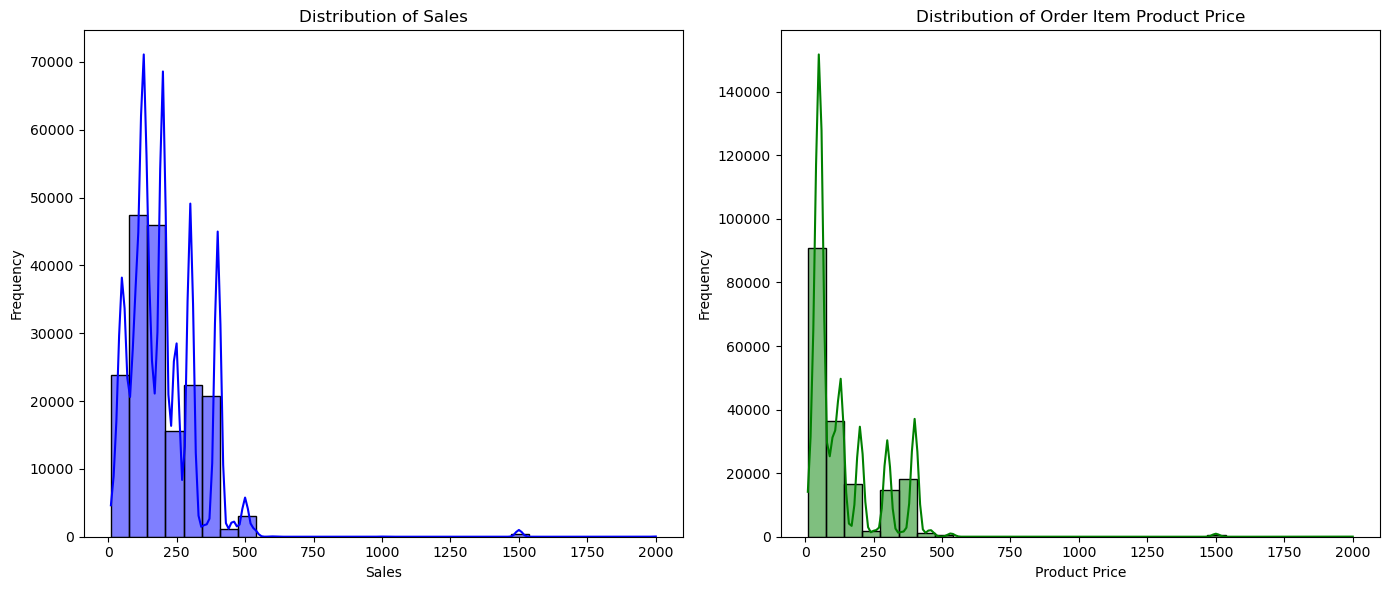

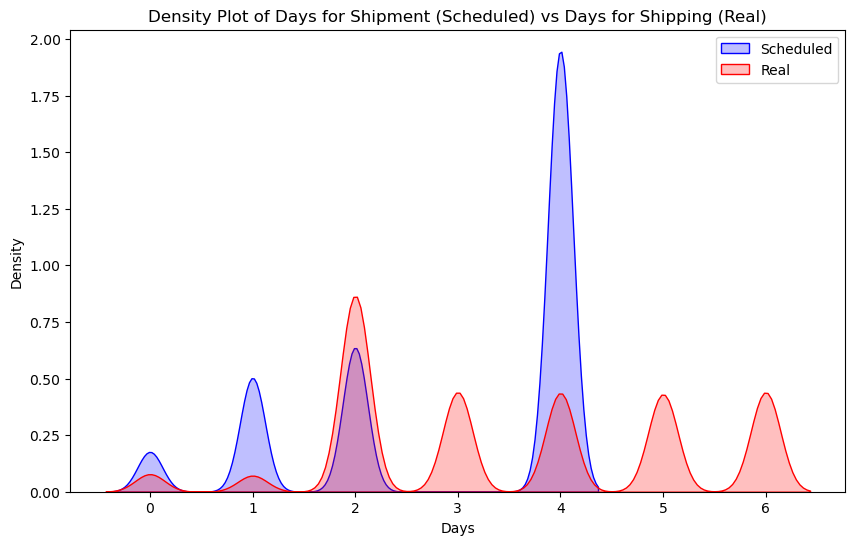

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset has already been loaded into a DataFrame `df`

# List of relevant numerical columns for analysis
numerical_cols = ['Days for shipment (scheduled)', 'Days for shipping (real)', 'Sales', 'Order Item Product Price']

# Descriptive statistics for numerical columns
summary_stats = df[numerical_cols].describe()
print("Summary Statistics:\n", summary_stats)

# Calculate additional statistics - Median and Mode
for col in numerical_cols:
    median = df[col].median()
    mode = df[col].mode()[0] if not df[col].mode().empty else 'No mode'
    std_dev = df[col].std()
    print(f"\nColumn: {col}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std_dev}")

# Evaluate scheduling accuracy
df['Shipment Accuracy'] = df['Days for shipment (scheduled)'] - df['Days for shipping (real)']
print("\nShipment Accuracy (Scheduled vs Real):\n", df['Shipment Accuracy'].describe())

# Plot histograms for 'Sales' and 'Order Item Product Price'
plt.figure(figsize=(14, 6))

# Histogram for 'Sales'
plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], kde=True, color='blue', bins=30)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Histogram for 'Order Item Product Price'
plt.subplot(1, 2, 2)
sns.histplot(df['Order Item Product Price'], kde=True, color='green', bins=30)
plt.title('Distribution of Order Item Product Price')
plt.xlabel('Product Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Density plot for 'Days for shipment (scheduled)' and 'Days for shipping (real)'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Days for shipment (scheduled)'], label='Scheduled', color='blue', shade=True)
sns.kdeplot(df['Days for shipping (real)'], label='Real', color='red', shade=True)
plt.title('Density Plot of Days for Shipment (Scheduled) vs Days for Shipping (Real)')
plt.xlabel('Days')
plt.ylabel('Density')
plt.legend()
plt.show()



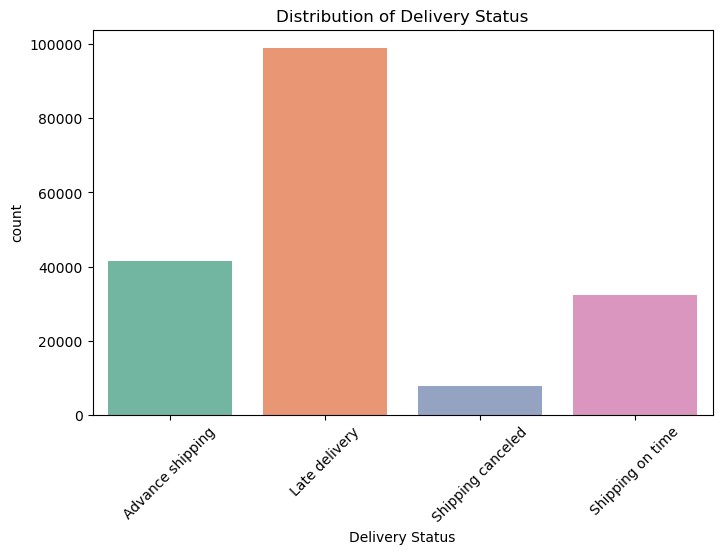

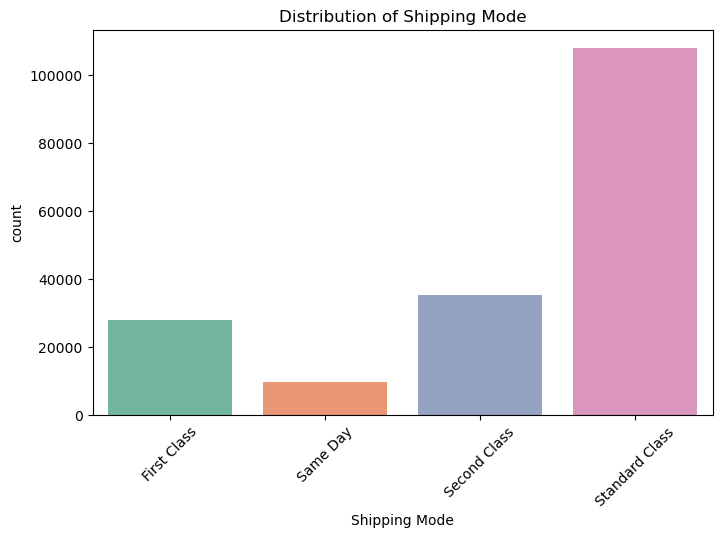

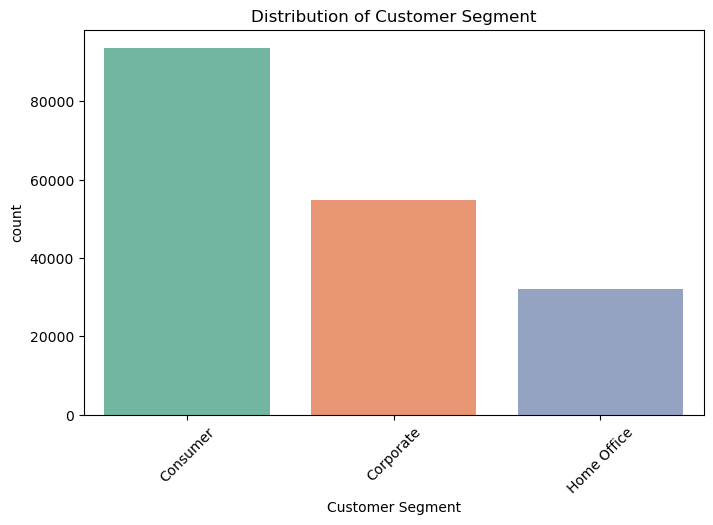

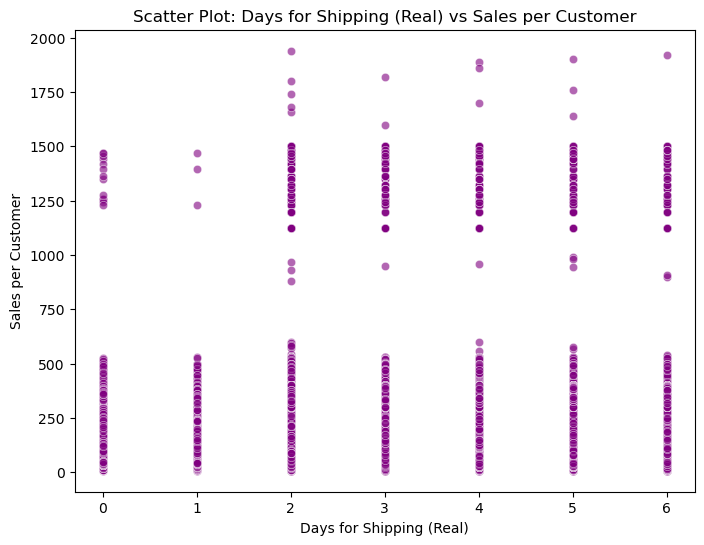

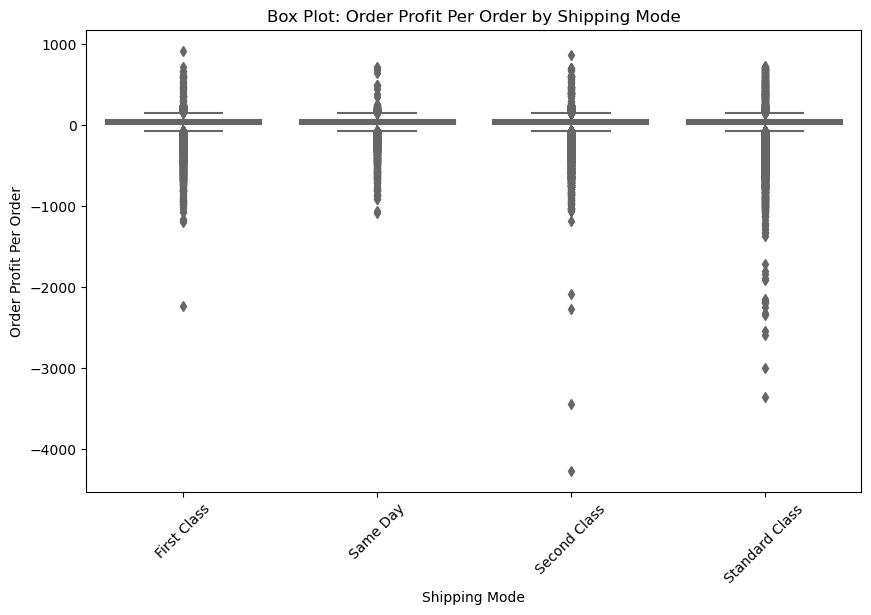

In [6]:
import warnings

# Suppress the specific warning related to seaborn and pandas grouping
warnings.filterwarnings('ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset has already been loaded into a DataFrame `df`

# 1. Univariate Analysis: Frequency counts and bar charts for categorical variables
categorical_cols = ['Delivery Status', 'Shipping Mode', 'Customer Segment']

# Frequency counts and bar plots for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# 2. Bivariate Analysis: Scatter plot for Days for Shipping (Real) vs Sales per Customer
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Days for shipping (real)', y='Sales per customer', data=df, color='purple', alpha=0.6)
plt.title('Scatter Plot: Days for Shipping (Real) vs Sales per Customer')
plt.xlabel('Days for Shipping (Real)')
plt.ylabel('Sales per Customer')
plt.show()

# 3. Bivariate Analysis: Box plot of Order Profit Per Order for different Shipping Modes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Shipping Mode', y='Order Profit Per Order', data=df, palette='coolwarm')
plt.title('Box Plot: Order Profit Per Order by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Order Profit Per Order')
plt.xticks(rotation=45)
plt.show()



In [7]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Read a sample of the file to detect encoding
file_path = r'DataCosupplyChainDataset.csv'
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read(10000))  # Read first 10,000 bytes
    encoding_type = result['encoding']
    print(f"Detected encoding: {encoding_type}")

# Load the dataset with the detected encoding
df1 = pd.read_csv(file_path, encoding=encoding_type)

df1.info()

Detected encoding: ISO-8859-1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  

In [8]:
df1.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [9]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = r'DataCosupplyChainDataset.csv'
df1 = pd.read_csv(file_path, encoding='ISO-8859-1')

# Inspect the data
df1.info()

# Dropping columns that are not useful or have many missing values
df1.drop(columns=['Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password',
                  'Product Description', 'Order Zipcode'], inplace=True)

# Fill missing values if necessary (basic example)
df1.fillna(0, inplace=True)

# Convert categorical columns into numerical form using LabelEncoder
label_encoders = {}
categorical_columns = df1.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le

# Split the data into features (X) and target (y)
X = df1.drop(columns=['Sales'])  # Assuming 'Sales' is the target column
y = df1['Sales']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [10]:
# Define initial parameters for XGBoost
param = {
    'objective': 'reg:squarederror',  # Regression task
    'tree_method': 'gpu_hist',  # Use GPU for acceleration
    'eval_metric': 'rmse',  # Root Mean Squared Error as evaluation metric
    'max_depth': 6,
    'eta': 0.1,
    'seed': 42
}

# Set evaluation data
evallist = [(dtest, 'eval'), (dtrain, 'train')]

# Train the model
num_round = 100
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10)


[0]	eval-rmse:118.63346	train-rmse:119.23966
[1]	eval-rmse:106.88642	train-rmse:107.38160
[2]	eval-rmse:96.27239	train-rmse:96.70905
[3]	eval-rmse:86.71314	train-rmse:87.09407
[4]	eval-rmse:78.10998	train-rmse:78.44296
[5]	eval-rmse:70.36109	train-rmse:70.65530
[6]	eval-rmse:63.38852	train-rmse:63.64536
[7]	eval-rmse:57.11377	train-rmse:57.34192
[8]	eval-rmse:51.46483	train-rmse:51.65943
[9]	eval-rmse:46.37042	train-rmse:46.54083
[10]	eval-rmse:41.78877	train-rmse:41.93956
[11]	eval-rmse:37.66356	train-rmse:37.79712


C:\Users\te529963\Anaconda3\envs\hu_env39\lib\site-packages\xgboost\core.py:158: UserWarning: [13:41:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[12]	eval-rmse:33.95132	train-rmse:34.06606
[13]	eval-rmse:30.61215	train-rmse:30.71003
[14]	eval-rmse:27.60972	train-rmse:27.69600
[15]	eval-rmse:24.89944	train-rmse:24.97338
[16]	eval-rmse:22.45856	train-rmse:22.52579
[17]	eval-rmse:20.26677	train-rmse:20.32324
[18]	eval-rmse:18.29484	train-rmse:18.34761
[19]	eval-rmse:16.51804	train-rmse:16.56227
[20]	eval-rmse:14.91153	train-rmse:14.94999
[21]	eval-rmse:13.46909	train-rmse:13.50292
[22]	eval-rmse:12.17026	train-rmse:12.20100
[23]	eval-rmse:11.00783	train-rmse:11.03601
[24]	eval-rmse:9.95958	train-rmse:9.98539
[25]	eval-rmse:9.02058	train-rmse:9.04525
[26]	eval-rmse:8.16858	train-rmse:8.18865
[27]	eval-rmse:7.39965	train-rmse:7.41931
[28]	eval-rmse:6.72346	train-rmse:6.74148
[29]	eval-rmse:6.10412	train-rmse:6.12101
[30]	eval-rmse:5.55089	train-rmse:5.56617
[31]	eval-rmse:5.05557	train-rmse:5.07228
[32]	eval-rmse:4.61757	train-rmse:4.63477
[33]	eval-rmse:4.22072	train-rmse:4.23947
[34]	eval-rmse:3.86746	train-rmse:3.88624
[35]	eval-

In [11]:
import optuna

def objective(trial):
    # Define hyperparameters to be tuned
    param = {
        'objective': 'reg:squarederror',  # Regression task
        'tree_method': 'gpu_hist',  # GPU for tree construction
        'eval_metric': 'rmse',  # Evaluation metric
        'max_depth': trial.suggest_int('max_depth', 3, 10),  # Tree depth
        'eta': trial.suggest_loguniform('eta', 1e-8, 1.0),  # Learning rate
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),  # Minimum loss reduction to split
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 10.0),  # L2 regularization
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 10.0),  # L1 regularization
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),  # Subsample ratio of the training data
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0)  # Subsample ratio of columns
    }

    # Train model
    num_round = 100
    bst = xgb.train(param, dtrain, num_round, evals=evallist, early_stopping_rounds=10, verbose_eval=False)
    
    # Predict and calculate RMSE on the validation set
    preds = bst.predict(dtest)
    rmse = ((preds - y_test) ** 2).mean() ** 0.5  # Root Mean Squared Error

    return rmse

# Create the study and optimize hyperparameters
study = optuna.create_study(direction='minimize')  # We want to minimize RMSE
study.optimize(objective, n_trials=50)

# Output the best hyperparameters
print('Best trial:', study.best_trial.params)


[I 2024-11-23 13:41:19,103] A new study created in memory with name: no-name-1d43c764-0b96-4768-8f50-c3e8fc4e9155
C:\Users\te529963\Anaconda3\envs\hu_env39\lib\site-packages\xgboost\core.py:158: UserWarning: [13:41:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-23 13:41:19,548] Trial 0 finished with value: 130.10512676051454 and parameters: {'max_depth': 3, 'eta': 0.00012774464151398102, 'gamma': 0.0031609391803837732, 'lambda': 0.830279409355796, 'alpha': 0.00345266131733689, 'subsample': 0.5080632841355068, 'colsample_bytree': 0.6724470353941172}. Best is trial 0 with value: 130.10512676051454.
C:\Users\te529963\Anaconda3\envs\hu_env39\lib\site-packages\xgboost\core.

C:\Users\te529963\Anaconda3\envs\hu_env39\lib\site-packages\xgboost\core.py:158: UserWarning: [13:41:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-23 13:41:31,496] Trial 11 finished with value: 1.5354472340231817 and parameters: {'max_depth': 7, 'eta': 0.9693796197471778, 'gamma': 7.090511532906125e-06, 'lambda': 8.872411248366197e-08, 'alpha': 5.239280588872789, 'subsample': 0.6386383174749899, 'colsample_bytree': 0.5125334857363033}. Best is trial 10 with value: 1.4018124670044068.
C:\Users\te529963\Anaconda3\envs\hu_env39\lib\site-packages\xgboost\core.py:158: UserWarning: [13:41:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a

C:\Users\te529963\Anaconda3\envs\hu_env39\lib\site-packages\xgboost\core.py:158: UserWarning: [13:41:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-23 13:41:41,263] Trial 22 finished with value: 0.9613633257871547 and parameters: {'max_depth': 8, 'eta': 0.2365252329230508, 'gamma': 7.297209101112982e-06, 'lambda': 1.350054635293944e-07, 'alpha': 0.023868279278092583, 'subsample': 0.7028932999819789, 'colsample_bytree': 0.554521267528576}. Best is trial 17 with value: 0.7747495353594764.
C:\Users\te529963\Anaconda3\envs\hu_env39\lib\site-packages\xgboost\core.py:158: UserWarning: [13:41:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-001

[I 2024-11-23 13:41:50,728] Trial 33 finished with value: 0.6247825927759888 and parameters: {'max_depth': 6, 'eta': 0.2260587597882451, 'gamma': 0.002861439421405106, 'lambda': 0.00042472577350033294, 'alpha': 0.0075683547168081825, 'subsample': 0.6044297594856887, 'colsample_bytree': 0.7875328097463719}. Best is trial 33 with value: 0.6247825927759888.
C:\Users\te529963\Anaconda3\envs\hu_env39\lib\site-packages\xgboost\core.py:158: UserWarning: [13:41:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-23 13:41:51,318] Trial 34 finished with value: 1.2144769349880455 and parameters: {'max_depth': 5, 'eta': 0.10417292850915259, 'gamma': 0.011400968033221815, 'lambda': 0.00

[I 2024-11-23 13:41:58,816] Trial 46 finished with value: 2.4805122585898234 and parameters: {'max_depth': 5, 'eta': 0.9727765556052719, 'gamma': 0.02293991299804155, 'lambda': 0.15547934089116358, 'alpha': 2.7699202825793e-06, 'subsample': 0.5040160009614743, 'colsample_bytree': 0.8711850002120645}. Best is trial 33 with value: 0.6247825927759888.
C:\Users\te529963\Anaconda3\envs\hu_env39\lib\site-packages\xgboost\core.py:158: UserWarning: [13:41:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
[I 2024-11-23 13:41:59,304] Trial 47 finished with value: 1.1292462383787227 and parameters: {'max_depth': 4, 'eta': 0.5017285700823053, 'gamma': 0.08576472508554474, 'lambda': 6.1361427136

Best trial: {'max_depth': 6, 'eta': 0.2260587597882451, 'gamma': 0.002861439421405106, 'lambda': 0.00042472577350033294, 'alpha': 0.0075683547168081825, 'subsample': 0.6044297594856887, 'colsample_bytree': 0.7875328097463719}


In [12]:
# Get the best hyperparameters
best_params = study.best_trial.params
best_params['objective'] = 'reg:squarederror'
best_params['tree_method'] = 'gpu_hist'
best_params['eval_metric'] = 'rmse'

# Retrain the model with optimized parameters
bst = xgb.train(best_params, dtrain, num_round, evallist, early_stopping_rounds=10)

# Evaluate on the test set
preds = bst.predict(dtest)

# Calculate final RMSE
final_rmse = ((preds - y_test) ** 2).mean() ** 0.5
print(f'Final RMSE: {final_rmse}')


[0]	eval-rmse:102.00193	train-rmse:102.56934
[1]	eval-rmse:79.02130	train-rmse:79.48131
[2]	eval-rmse:61.25180	train-rmse:61.60828
[3]	eval-rmse:47.50546	train-rmse:47.78195
[4]	eval-rmse:36.88028	train-rmse:37.09980
[5]	eval-rmse:28.64749	train-rmse:28.81908
[6]	eval-rmse:22.29560	train-rmse:22.43619
[7]	eval-rmse:17.37047	train-rmse:17.49081
[8]	eval-rmse:13.56153	train-rmse:13.65542
[9]	eval-rmse:10.63191	train-rmse:10.70728
[10]	eval-rmse:8.36703	train-rmse:8.43360
[11]	eval-rmse:6.59545	train-rmse:6.65188
[12]	eval-rmse:5.25411	train-rmse:5.30264
[13]	eval-rmse:4.23380	train-rmse:4.27854
[14]	eval-rmse:3.46011	train-rmse:3.49625
[15]	eval-rmse:2.90909	train-rmse:2.94484
[16]	eval-rmse:2.49358	train-rmse:2.52917
[17]	eval-rmse:2.14142	train-rmse:2.17450
[18]	eval-rmse:1.87929	train-rmse:1.90742
[19]	eval-rmse:1.73580	train-rmse:1.76509
[20]	eval-rmse:1.58933	train-rmse:1.61621
[21]	eval-rmse:1.47062	train-rmse:1.49352
[22]	eval-rmse:1.38397	train-rmse:1.40737
[23]	eval-rmse:1.32386

C:\Users\te529963\Anaconda3\envs\hu_env39\lib\site-packages\xgboost\core.py:158: UserWarning: [13:42:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [13]:
# Import necessary libraries
import shap
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv(r'DataCosupplyChainDataset.csv', encoding='ISO-8859-1')


# Data Preparation
# Define categorical columns based on the actual column names in the dataset
categorical_cols = ['Category Name', 'Department Name', 'Delivery Status', 'Customer Country', 'Order Region']

# Label encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define the features and target variable
X = df[['Days for shipping (real)', 'Days for shipment (scheduled)', 
        'Benefit per order', 'Sales per customer', 
        'Late_delivery_risk'] + categorical_cols]
y = df['Order Item Profit Ratio']  # Example target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# SHAP Analysis
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Plot SHAP values
shap.summary_plot(shap_values, X_test)


ModuleNotFoundError: No module named 'shap'

In [ ]:
Task1: create models using XGBoost, SVM, RF and GAM. The create a table comparing the COR, RMSE, MAE, Rsqaure, Min-Max ACC, SD and a decision column stating best model. Task 2: Optuna framework to optimize hyper parameters   Task3: Generate 5 seeds and report the median with variance for task 1

In [ ]:
import numpy as np
import pandas as pd
import shap
import xgboost as xgb

print("All libraries imported successfully!")


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import optuna
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from pygam import LinearGAM

# Load dataset
df = pd.read_csv(r'DataCosupplyChainDataset.csv', encoding='ISO-8859-1')

# Data Preparation
# Define categorical columns based on the actual column names in the dataset
categorical_cols = ['Category Name', 'Department Name', 'Delivery Status', 'Customer Country', 'Order Region']

# Label encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
X = df[['Days for shipping (real)', 'Days for shipment (scheduled)', 
         'Benefit per order', 'Sales per customer', 
         'Late_delivery_risk'] + categorical_cols]
y = df['Order Item Profit Ratio']  # Example target variable

# Function to evaluate models
def evaluate_model(y_true, y_pred):
    cor = np.corrcoef(y_true, y_pred)[0, 1]
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    min_max_acc = np.mean((np.min(y_pred) <= y_true) & (y_true <= np.max(y_pred)))
    sd = np.std(y_pred)
    return cor, rmse, mae, r2, min_max_acc, sd

# Task 1: Train and evaluate models across multiple seeds
seeds = [42, 50, 60, 70, 80]
results = []

for seed in seeds:
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    # Train XGBoost model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=seed)
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    metrics_xgb = evaluate_model(y_test, y_pred_xgb)
    results.append(['XGBoost'] + list(metrics_xgb))

    # Train SVM model
    svm_model = SVR(kernel='rbf')
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)
    metrics_svm = evaluate_model(y_test, y_pred_svm)
    results.append(['SVM'] + list(metrics_svm))

    # Train Random Forest model
    rf_model = RandomForestRegressor(random_state=seed)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    metrics_rf = evaluate_model(y_test, y_pred_rf)
    results.append(['Random Forest'] + list(metrics_rf))

    # Train GAM model
    gam_model = LinearGAM().fit(X_train, y_train)
    y_pred_gam = gam_model.predict(X_test)
    metrics_gam = evaluate_model(y_test, y_pred_gam)
    results.append(['GAM'] + list(metrics_gam))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'COR', 'RMSE', 'MAE', 'R^2', 'Min-Max Accuracy', 'SD'])

# Task 2: Hyperparameter Optimization with Optuna

def optimize_xgb(trial):
    param = {
        'objective': 'reg:squarederror',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_loguniform('eta', 1e-8, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'eval_metric': 'rmse',
    }
    
    xgb_model = xgb.XGBRegressor(**param, random_state=42)
    xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)
    preds = xgb_model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    return rmse

def optimize_svm(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    epsilon = trial.suggest_uniform('epsilon', 0.01, 1.0)
    
    svm_model = SVR(C=C, epsilon=epsilon)
    svm_model.fit(X_train, y_train)
    preds = svm_model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    return rmse

def optimize_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    preds = rf_model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    return rmse

# Optuna study for each model
studies = {
    'XGBoost': optuna.create_study(direction='minimize'),
    'SVM': optuna.create_study(direction='minimize'),
    'Random Forest': optuna.create_study(direction='minimize')
}

studies['XGBoost'].optimize(optimize_xgb, n_trials=50)
studies['SVM'].optimize(optimize_svm, n_trials=50)
studies['Random Forest'].optimize(optimize_rf, n_trials=50)

# Retrieve best parameters
best_params = {
    'XGBoost': studies['XGBoost'].best_params,
    'SVM': studies['SVM'].best_params,
    'Random Forest': studies['Random Forest'].best_params,
}

print("Best parameters:")
for model, params in best_params.items():
    print(f"{model}: {params}")

# Task 3: Calculate median and variance for metrics across seeds
metrics_df = pd.DataFrame(results_df)

# Group by model and calculate median and variance
final_metrics = metrics_df.groupby('Model').agg(['median', 'var'])
print("Final Metrics:")
print(final_metrics)

# Generate SHAP values for the best model (XGBoost)
best_xgb_model = xgb.XGBRegressor(**best_params['XGBoost'], random_state=42)
best_xgb_model.fit(X_train, y_train)
explainer = shap.Explainer(best_xgb_model, X_train)
shap_values = explainer(X_test)

# Plot SHAP values for the best model
shap.summary_plot(shap_values, X_test)
